<h1 style="font-family: TimesNewRoman;">Predicting Income Category Using KNN: Exploring Key Factors</h1>

<h2 style="font-family: TimesNewRoman;">Introduction:</h2>

<p style="font-family: TimesNewRoman;">

In today's society, income plays a crucial role in an individual's financial well-being. It determines an individual's ability to meet their basic needs, achieve financial security, and pursue their goals and aspirations. The level of income is affected by several factors such as age, education, occupation, work class, marital status, and gender. Understanding the relationship between these factors and an individual's income is essential in making informed decisions regarding education, career choices, and financial planning. With this project, we aim to explore the key factors that affect an individual's income and predict their income category using K-Nearest Neighbors (KNN) classification algorithm.
    
**Question we're asking:**

Our primary question is to identify the key factors that contribute to an individual's income level and explore the relationship between these factors and income category. The main goal of this project is to predict an individual's income category based on several variables such as age, education, occupation, work class, marital status, and gender. We will use the KNN classification algorithm to predict the income category, where an income of less than 50,000 USD per year is considered a low-income category, and an income of more than $50,000 per year is considered a high-income category.

To answer our research question, we will be using the "Adult" dataset obtained from the UCI Machine Learning Repository. This dataset contains over 48,000 records of individuals with various attributes such as age, education, occupation, work class, marital status, gender, and more. The dataset is an excellent resource for studying the relationship between income and various factors. We will preprocess the data by cleaning, transforming, and normalizing it before applying the KNN algorithm to classify income categories. By analyzing the dataset, we aim to provide insights into the key factors that influence an individual's income and how these factors can be leveraged to improve an individual's financial well-being.

</p>

<h1 style="font-family: TimesNewRoman;">Preliminary exploratory data analysis:</h1>


<h2 style="font-family: TimesNewRoman;">Loading and Cleaning the data:</h2>

In [4]:
# Installing necessary packages for data analysis

install.packages("magrittr")
install.packages("janitor")


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [5]:
# Loading necessary libraries

library(tidyverse)
library(magrittr)
library(janitor)
library(rsample)

In [6]:
# Set the URL for the adult dataset
adult_data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Set the file path to save the downloaded dataset
adult_data_path <- "adult.csv"

# Download the dataset from the specified URL and save it to the specified file path
download.file(adult_data_url, destfile = adult_data_path)

# Read the downloaded CSV file into a data frame with the specified column names
adult_data_raw <- read_csv(adult_data_path, col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"))

# View the first few rows of the dataset
head(adult_data_raw)


Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
# Start by using "glimpse" to view the column names and data pertaining to the columns
glimpse(adult_data_raw)

Rows: 32,561
Columns: 15
$ age              <dbl> 39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 37, 30, 23, 3…
$ workclass        <chr> "State-gov", "Self-emp-not-inc", "Private", "Private"…
$ fnlwgt           <dbl> 77516, 83311, 215646, 234721, 338409, 284582, 160187,…
$ education        <chr> "Bachelors", "Bachelors", "HS-grad", "11th", "Bachelo…
$ `education-num`  <dbl> 13, 13, 9, 7, 13, 14, 5, 9, 14, 13, 10, 13, 13, 12, 1…
$ `marital-status` <chr> "Never-married", "Married-civ-spouse", "Divorced", "M…
$ occupation       <chr> "Adm-clerical", "Exec-managerial", "Handlers-cleaners…
$ relationship     <chr> "Not-in-family", "Husband", "Not-in-family", "Husband…
$ race             <chr> "White", "White", "White", "Black", "Black", "White",…
$ sex              <chr> "Male", "Male", "Male", "Male", "Female", "Female", "…
$ `capital-gain`   <dbl> 2174, 0, 0, 0, 0, 0, 0, 0, 14084, 5178, 0, 0, 0, 0, 0…
$ `capital-loss`   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `hours-per-we

In [8]:
# Manipulate the name of vectors to make them clean
adult_data_mani_names = tibble::as_tibble(adult_data_raw, .name_repair = janitor::make_clean_names)

head(adult_data_mani_names)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,x15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
# Replace all ? with NA
adult_data_clean <- apply(adult_data_mani_names, 2, function(x) gsub("\\?", NA, x))

# Convert to tibble
adult_data_clean <- tibble::as_tibble(adult_data_clean)
                          

# remove rows with any NA values                          
adult_data <- na.omit(adult_data_clean)


# print just the head result                          
head(adult_data)                          


age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,x15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
# number of NA Values
sum(is.na(adult_data))

[1] 0

In [11]:
# converting vectors to factors
# known factors
# - workclass
# - education
# - marital_status
# - occupation
# - relationship
# - race
# - sex
# - native_country

adult_data <- adult_data |>
    rowwise() |>
    mutate(age = as.numeric(age),
           fnlwgt = as.numeric(fnlwgt),
           education_num = as.numeric(education_num),
           capital_gain = as.numeric(capital_gain),
           capital_loss = as.numeric(capital_loss),
           hours_per_week = as.numeric(hours_per_week),
           workclass = as_factor(workclass),
           education = as_factor(education),
           marital_status = as_factor(marital_status),
           occupation = as_factor(occupation),
           relationship = as_factor(relationship),
           race = as_factor(race),
           sex = as_factor(sex),
           native_country = as_factor(native_country))

head(adult_data)


age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,x15
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
# Select the unique values in the 'x15' column of the 'adult_data' data frame
adult_data |>       # pipe the 'adult_data' data frame to the next step
    select(x15) |>  # select only the 'x15' column
    unique()        # return only the unique values in the 'x15' column


x15
<chr>
<=50K
>50K


In [13]:
# x15 column is the class variable we want to use in the classification model
# changing the name of x15 to income 

adult_data <- adult_data |>
                mutate(income = as_factor(x15)) |>
                select(-x15)

head(adult_data)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [25]:
#set the seed
set.seed(1234)

#splitting the dataset into training data and testing data

adult_split <- initial_split(adult_data, prop = 0.75, strata = income)
adult_train <- training(adult_split)
adult_test <- testing(adult_split) 

names(adult_train)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education_num"  "marital_status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital_gain"   "capital_loss"  
[13] "hours_per_week" "native_country" "income"

ERROR: Error in count(workclass): object 'workclass' not found


In [30]:
# Create a summary table for the training data
adult_train_summary <- adult_train %>%
  group_by(income) %>%
  summarize(
    n = n(),                            # Number of observations in each class
    mean_age = mean(age),         
    mean_fnlwgt = mean(fnlwgt),       
    mean_education_num = mean(education_num),
    mean_education_capital_gain = mean(capital_gain),
    mean_education_capital_loss = mean(capital_loss),
    mean_hours_per_week = mean(hours_per_week),
    missing_data = sum(is.na(.)),        
    )

adult_train_summary

income,n,mean_age,mean_fnlwgt,mean_education_num,mean_education_capital_gain,mean_education_capital_loss,mean_hours_per_week,missing_data
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
<=50K,16990,36.59594,191150.8,9.621012,147.9076,52.53337,39.34809,0
>50K,5631,44.04244,187337.3,11.623513,3968.1225,201.47452,45.66667,0


**Summary Table:**

From the table above, we can make the following observations:

- We have more individuals in the <=50K income category
- The mean age of individuals earning less than or equal to 50K is around 36.6 years old, while those earning above 50K have a mean age of around 44.0 years old.
- The mean fnlwgt (final weight) of individuals earning less than or equal to 50K is around 191150.8, while those earning above 50K have a mean fnlwgt of around 187337.3.
- Those earning above 50K have a higher mean education level as indicated by a higher mean education_num (11.6 compared to 9.6 for those earning less than or equal to 50K).
- Those earning above 50K have a much higher mean capital gain (3968.1) and mean capital loss (201.5) compared to those earning less than or equal to 50K (147.9 and 52.5 respectively).
- Those earning above 50K work on average more hours per week (45.7) compared to those earning less than or equal to 50K (39.3).
- There are no missing values in any of the variables in the training data.

In [31]:
# Based on the training data

# lets see our predictor class distribution
adult_train |>
    group_by(income) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_train) * 100,
        ) |>
    arrange(desc(percentage))

# lets see the age distribution
mean(adult_train$age, na.RM=TRUE)
median(adult_train$age, na.RM=TRUE)

# lets see the native-country distribution
adult_train |>
    group_by(native_country) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_train) * 100,
        ) |>
    arrange(desc(percentage)) |>
    head()

adult_train_above50k <- filter(adult_train, income==">50K")

# distribution of countries in the data with income above 50k
adult_train_above50k |>
    group_by(native_country) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_train_above50k) * 100,
        ) |>
    arrange(desc(percentage)) |>
    head()

# distribution of income in the data from united-states
adult_train |>
    filter(native_country=="United-States") |>
    group_by(income) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_train) * 100,
        ) |>
    arrange(desc(percentage))
# maximum data is from United-states

income,count,percentage
<fct>,<int>,<dbl>
<=50K,16990,75.1072
>50K,5631,24.8928


[1] 38.44958

[1] 37

native_country,count,percentage
<fct>,<int>,<dbl>
United-States,20613,91.1232925
Mexico,459,2.0290880
Philippines,141,0.6233146
Germany,96,0.4243844
India,81,0.3580744
Puerto-Rico,78,0.3448123


native_country,count,percentage
<fct>,<int>,<dbl>
United-States,5238,93.0207778
Philippines,47,0.8346652
Germany,37,0.6570769
India,31,0.5505239
England,27,0.4794885
Canada,23,0.4084532


income,count,percentage
<fct>,<int>,<dbl>
<=50K,15375,67.96782
>50K,5238,23.15548


**Observations:**

Based on the tables above, we can make several observations about the data:

- The majority of the data (75.1%) is in the class of income less than or equal to 50K, while only a smaller proportion (24.9%) is in the class of income greater than 50K.

- The age distribution is relatively similar between the two income classes, with data distributed almost equally over the range of 20-50.

- The native_country variable is not very useful as a predictor, as most of the recorded data is from the United States, making it difficult to discern any meaningful differences between countries.

- While most of the data for the income class above 50K comes from the United States (91.1%), the distribution of the two income classes among the United States data is similar to that of the whole dataset. Therefore, the native_country variable is not very useful for predicting income.

Overall, it seems that the age variable is a more useful predictor for distinguishing between the two income classes than the native_country variable.

In [32]:
# Removing native_country from our training dataset

adult_train |> select(-native_country)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,<=50K
34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,<=50K
32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,<=50K
38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,<=50K
35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,<=50K
43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,<=50K


In [33]:
adult_train |>
    group_by(sex) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_train) * 100,
        ) |>
    arrange(desc(percentage))

adult_train |>
    group_by(sex, income) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_train) * 100,
        ) |>
    arrange(desc(percentage))

sex,count,percentage
<fct>,<int>,<dbl>
Male,15329,67.76447
Female,7292,32.23553


`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,income,count,percentage
<fct>,<fct>,<int>,<dbl>
Male,<=50K,10554,46.655762
Female,<=50K,6436,28.451439
Male,>50K,4775,21.108704
Female,>50K,856,3.784094


**Observations:**

Using these tables we notice that the distribution of the sex variable seems usable as a predictor variable, as the ratios are normal 


Till now the variables that are usable for classification are :-
 - sex
 - age
 - hours-per-week
 - race
 - occupation
 - education
 - workclass
 - education_num

**Based on the above observations, the following plots could be useful:**

Bar plot of income by education level: This would show the distribution of income levels across different education levels and help us understand the relationship between education and income.

Scatter plot of age vs. hours per week by income: This would help us understand if there is a relationship between age, hours worked, and income.

Histogram of age by income: This would show the distribution of ages across the two income groups and help us understand if there is a difference in age between the two groups.

Bar plot of workclass by income: This would show the distribution of income levels across different workclasses and help us understand if there is a relationship between workclass and income.

In [44]:
names(adult_train)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education_num"  "marital_status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital_gain"   "capital_loss"  
[13] "hours_per_week" "native_country" "income"

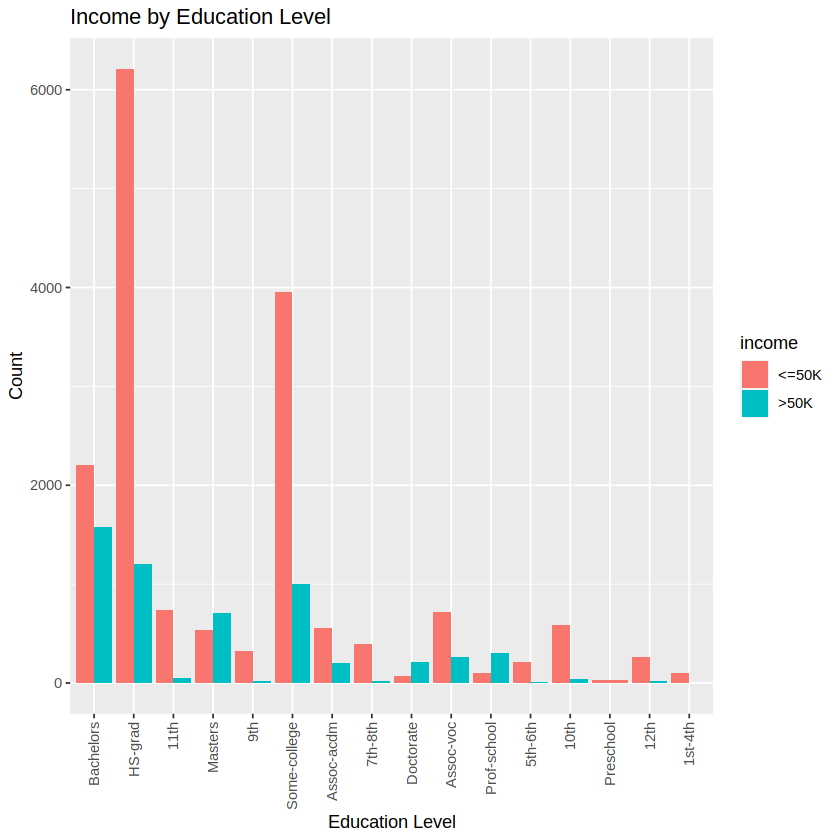

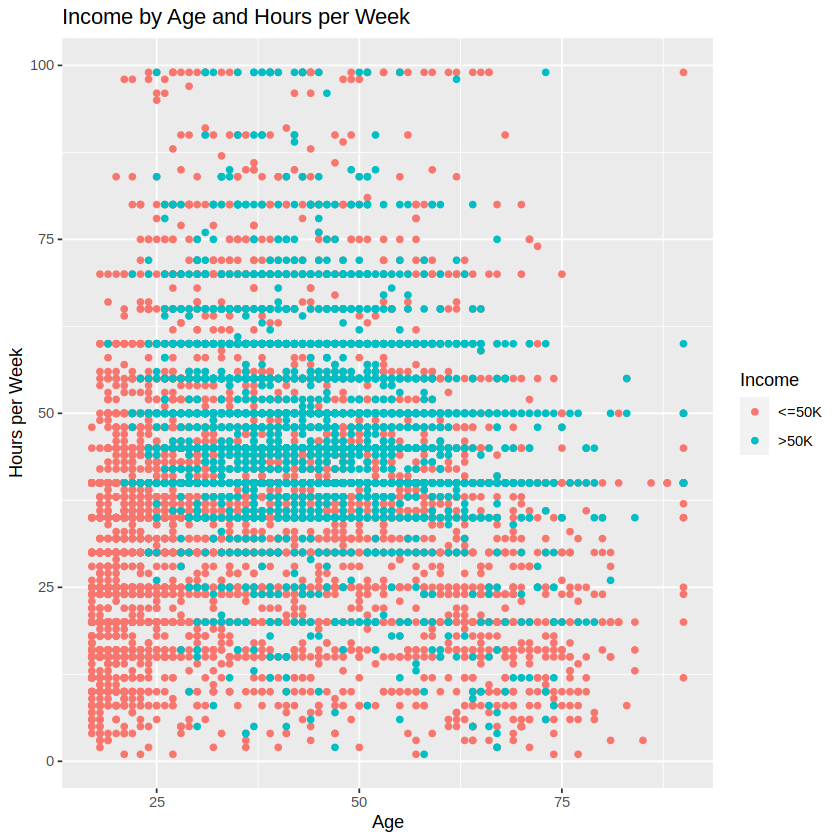

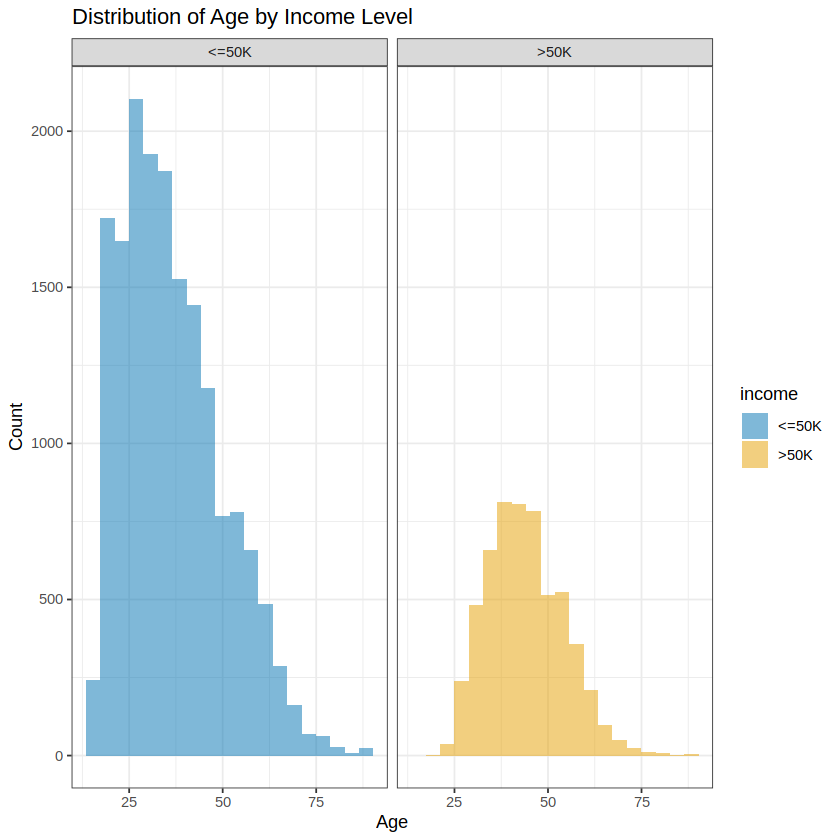

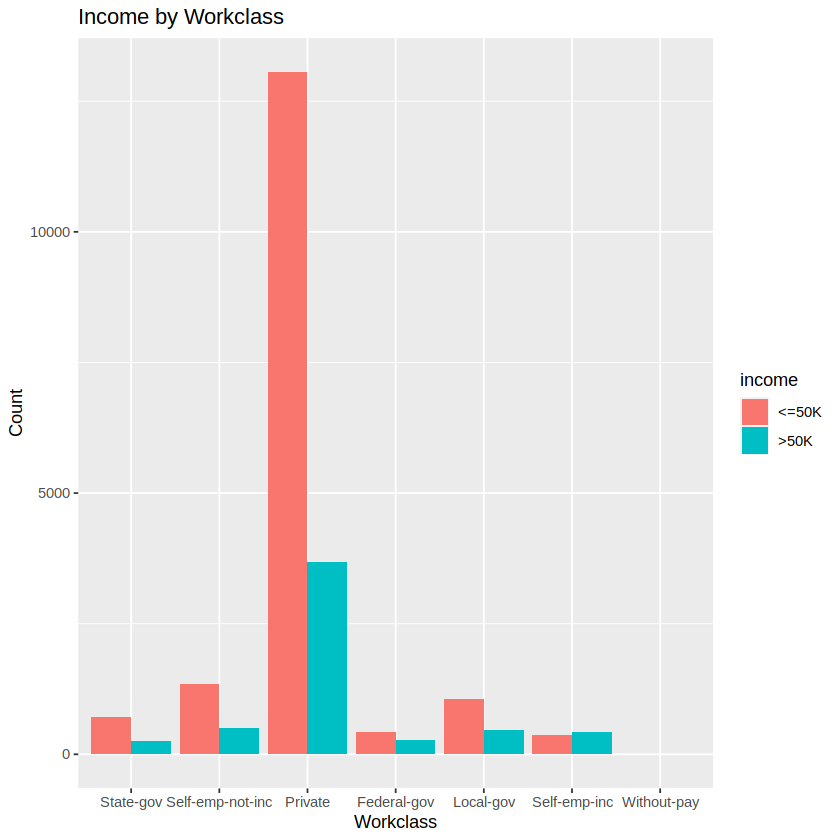

In [49]:
# Bar plot of income by education level
ggplot(adult_train, aes(x=education, fill=income)) + 
  geom_bar(position="dodge") +
  labs(title="Income by Education Level", x="Education Level", y="Count") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

# Scatter plot of age vs. hours per week by income:
ggplot(adult_train, aes(x=age, y=hours_per_week, color=income)) +
  geom_point() +
  labs(x = "Age", y = "Hours per Week", color = "Income") +
  ggtitle("Income by Age and Hours per Week")

# Histogram of age by income:
ggplot(adult_train, aes(x=age, fill=income)) +
  geom_histogram(alpha=0.5, position="identity", bins=20) +
  scale_fill_manual(values = c("#0072B2", "#E69F00")) +
  facet_wrap(~income, ncol=2) +
  xlab("Age") +
  ylab("Count") +
  ggtitle("Distribution of Age by Income Level") +
  theme_bw()

# Bar plot of workclass by income:
ggplot(adult_train, aes(x=workclass, fill=income)) + 
  geom_bar(position="dodge") +
  labs(title="Income by Workclass", x="Workclass", y="Count")



# ********needs to be changed******

From the above graphs we can see that in the middle age ranges we find the most records with >50k Income...

and as the education-num increases the income class as well...

education and education-num are very similar variables from their distribution, so we can use education-num as a factor instead of education

## Methods


## Expected outcomes and significance